This is the tutorial for protein protein interaction. The dataset that we use is called PPI Affinity.

First we import all necessary packages.

In [1]:
import os
import sys
import torch
import wandb
sys.path.append(os.path.abspath('..'))

from DeepProtein.dataset import *
import DeepProtein.utils as utils
import DeepProtein.PPI as models

Next we fix some hyperparamaters. Here we make wandb local.

In [2]:
wandb.init(mode='offline', name = "PPI_Affinity")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [3]:
lr = 0.001
epochs = 20
batch_size = 32
seed = 7
target_encoding = "CNN" # test only

Next we load our dataset

In [4]:
train_ppi = PPI_Affinity('../DeepProtein/data', 'train')
valid_ppi = PPI_Affinity('../DeepProtein/data', 'valid')
test_ppi = PPI_Affinity('../DeepProtein/data', 'test')

  

train_protein_1, train_protein_2, train_target, train_protein_idx = collate_fn_ppi(train_ppi, graph=False, unsqueeze= False)
valid_protein_1, valid_protein_2, valid_target, valid_protein_idx = collate_fn_ppi(valid_ppi, graph=False, unsqueeze= False)
test_protein_1, test_protein_2, test_target, test_protein_idx = collate_fn_ppi(test_ppi, graph=False, unsqueeze= False)


train, _, _ = data_process(X_target = train_protein_1, X_target_ = train_protein_2, y = train_target,
                target_encoding = target_encoding,
                split_method='random', frac=[0.99998, 1e-5, 1e-5],
                random_seed = 1)
_, val, _ = data_process(X_target = valid_protein_1, X_target_ = valid_protein_2, y = valid_target,
                target_encoding = target_encoding,
                split_method='random',frac=[1e-5, 0.99998, 1e-5],
                random_seed = 1)

_, _, test = data_process(X_target = test_protein_1, X_target_ = test_protein_2, y = test_target,
                target_encoding = target_encoding,
                split_method='random',frac=[1e-5, 1e-5, 0.99998],
                random_seed = 1)

 

Protein Protein Interaction Prediction Mode...
in total: 2421 protein-protein pairs
encoding protein...
unique target sequence: 546
encoding protein...
unique target sequence: 1581
Done.
Protein Protein Interaction Prediction Mode...
in total: 203 protein-protein pairs
encoding protein...
unique target sequence: 74
encoding protein...
unique target sequence: 138
Done.
Protein Protein Interaction Prediction Mode...
in total: 326 protein-protein pairs
encoding protein...
unique target sequence: 60
encoding protein...
unique target sequence: 283
Done.


load config

In [5]:
config = generate_config(target_encoding = target_encoding,
                             cls_hidden_dims = [512],
                             train_epoch = epochs,
                             LR = lr,
                             batch_size = batch_size,
                            )


Set seed

In [6]:
torch.manual_seed(seed)


Initialize the model and train the model

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---


e:\anaconda3\envs\graph\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Training at Epoch 1 iteration 0 with loss 153.762. Total time 0.00611 hours
Validation at Epoch 1 , MAE: 2.34791 , MSE: 8.86821 , Pearson Correlation: 0.35290 with p-value: 2.42E-07 , Concordance Index: 0.64686
Training at Epoch 2 iteration 0 with loss 13.4761. Total time 0.02 hours
Validation at Epoch 2 , MAE: 1.96616 , MSE: 6.16059 , Pearson Correlation: 0.39718 with p-value: 4.43E-09 , Concordance Index: 0.64518
Training at Epoch 3 iteration 0 with loss 6.68926. Total time 0.03416 hours
Validation at Epoch 3 , MAE: 1.91880 , MSE: 5.91344 , Pearson Correlation: 0.45688 with p-value: 7.30E-12 , Concordance Index: 0.66433
Training at Epoch 4 iteration 0 with loss 5.59096. Total time 0.04805 hours
Validation at Epoch 4 , MAE: 2.24765 , MSE: 8.97241 , Pearson Correlation: 0.48548 with p-value: 2.12E-13 , Concordance Index: 0.67928
Training at Epoch 5 iteration 0 with loss 4.19399. Total time 0.06194 hours
Validation at Epoch 5 , MAE: 2.07486 , MSE: 7.92328 , Pearson Correlation: 0.51019 

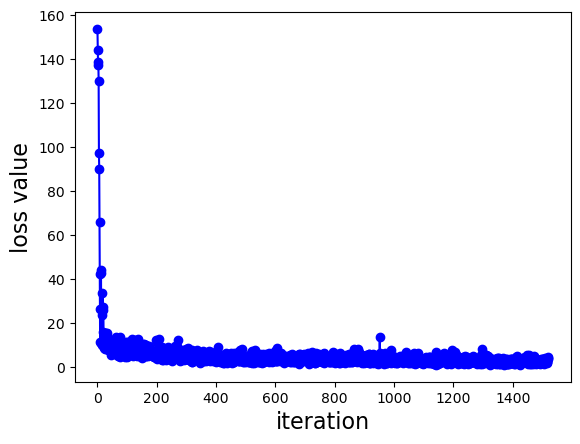

In [7]:
model = models.model_initialize(**config)
model.train(train, val, test)